# What is Simple Linear Regression?

One kind of regression technique that simulates the relationship between a dependent variable and one independent variable is called simple linear regression. A simple linear regression model is named such because the connection it depicts is linear, or a sloped straight line.

The dependent variable used in simple linear regression needs to have a continuous, actual value. On the other hand, the independent variable may be quantified using categorical or continuous values.


Dataset can be obtained here: https://www.kaggle.com/code/yashk12321423dsada/simple-linear-regression

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 2. Loading Datasets

In [2]:
df = pd.read_csv('/content/drive/MyDrive/My ML Use Case and Hands on/1. Simple Linear Regression/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# 3. Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.shape

(30, 2)

In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# 4. Data Visualization

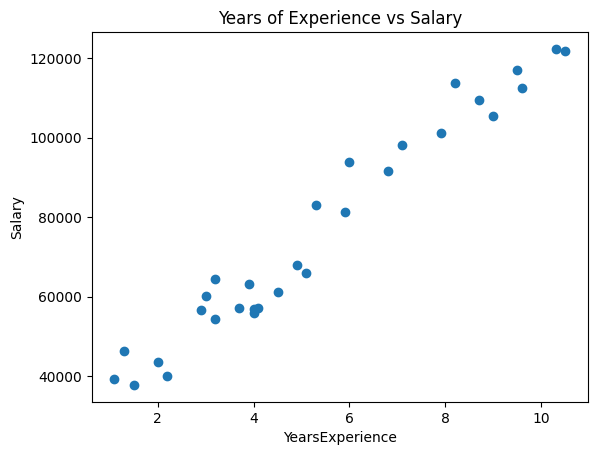

In [7]:
plt.scatter(data=df,x='YearsExperience', y='Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary');

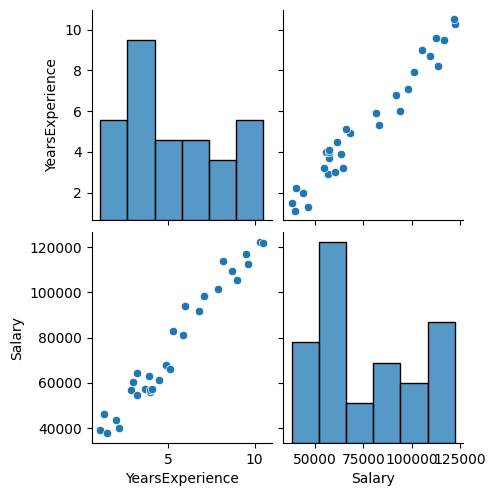

In [8]:
sns.pairplot(data=df)
plt.show()

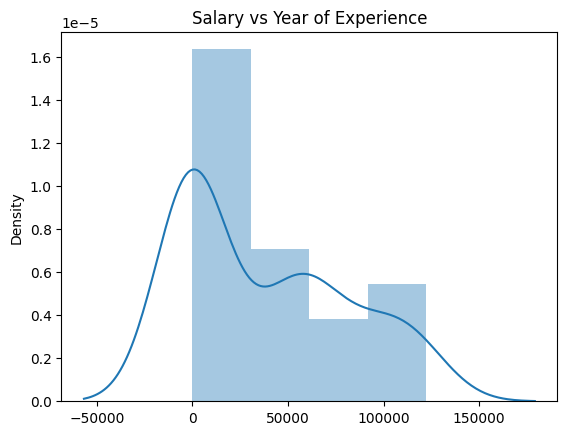

In [9]:
plt.title('Salary vs Year of Experience')
sns.distplot(df);

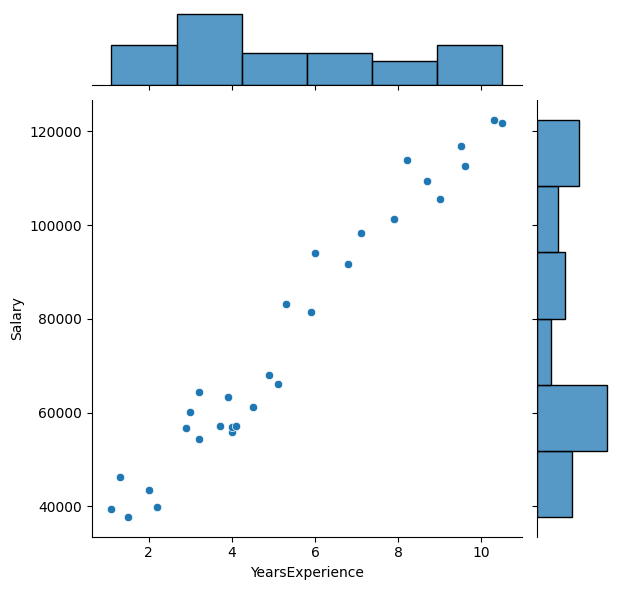

In [10]:
sns.jointplot(data=df,x='YearsExperience', y='Salary')
plt.show()

# 5. Independent and dapendent variables

The dataset contains two columns namely: “YearsExperience” and “Salary”. In this case the model will be using the YearsExperience to predict the Salary. Hence, YearsExperience is the independent variable and Salary is the dependent variable.

In [11]:
X = df[['YearsExperience']]
y = df['Salary']

In [12]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [13]:
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

# 6. Spliting Training set and Testing set

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 1/3, random_state=0)

# 7. Modeling
Training Simple Linear Regression model

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept =True)
model = lr.fit(X_train, y_train)

In [33]:
print('Linear Model Coefficient (m): ', lr.coef_)
print('Linear Model Coefficient (b): ', lr.intercept_)

Linear Model Coefficient (m):  [9345.94244312]
Linear Model Coefficient (b):  26816.192244031183


Therefore, the equation of our simple linear regression model is:

* Salary = 9379.71049195 * YearsExperience + 26986.691316737248

# 8. Prediction
Predicting the Test set Results

In [34]:
predictions = model.predict(X_test)
predictions

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [35]:
# Prediction result
y_pred_test = model.predict(X_test)     # predicted value of y_test
y_pred_train = model.predict(X_train)   # predicted value of y_train

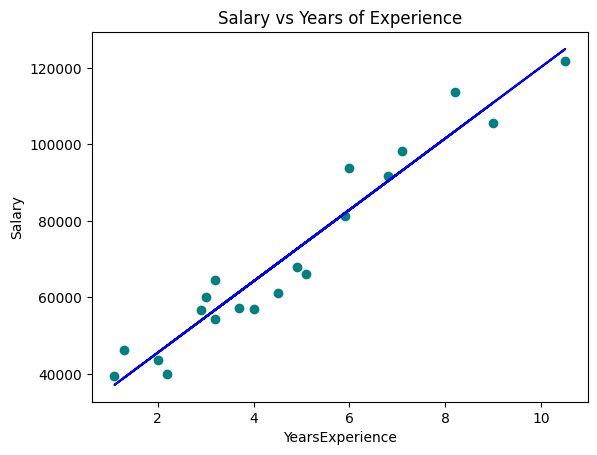

In [36]:
#VISUALIZE TRAIN SET RESULTS
plt.scatter(X_train, y_train, color = 'Teal')
plt.plot(X_train, y_pred_train, color = 'blue')
plt.ylabel('Salary')
plt.xlabel('YearsExperience')
plt.title('Salary vs Years of Experience');

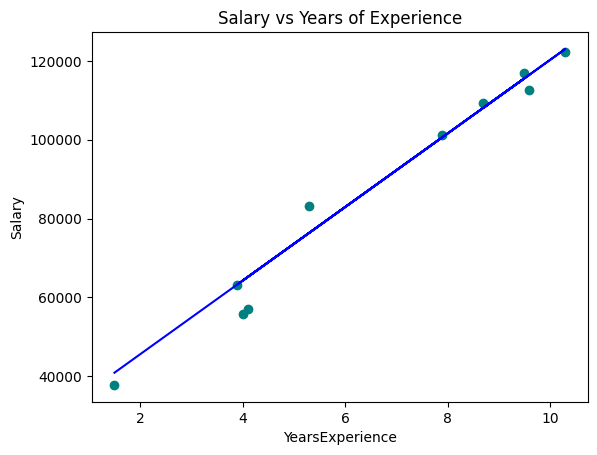

In [37]:
#VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'Teal')
plt.plot(X_test, y_pred_test, color = 'blue')
plt.ylabel('Salary')
plt.xlabel('YearsExperience')
plt.title('Salary vs Years of Experience');

In [41]:
lr.predict([[1.2]])

array([38031.32317578])

The actual value of the salary in the dataset for 1.2 yrs of experince was: 39344

Testing the model accuracy

In [39]:
from sklearn.metrics import r2_score
score = r2_score(y_test, predictions)
print("The accuracy of our model is {}%".format(round(score, 2) *100))


The accuracy of our model is 97.0%
